# Data Cleaning and Exploratory Data Analysis

Important note: The 1 million rows dataset on spotify data DOES NOT have genre information. At least when checked most recently... Idk how this was overlooked, but basically since the 1 million songs dataset does not have any genre information, we cannot use that dataset to make analyses on genre or combine with the billboard charts dataset.

In [22]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


In [23]:
spotify = pd.read_csv("../data/spotify_tracks.csv")
billboard = pd.read_csv("../data/Hot 100.csv")

In [24]:
billboard.head(5)

,chart_position,chart_date,song,performer,song_id,instance,time_on_chart,consecutive_weeks,previous_week,peak_position,worst_position,chart_debut,chart_url
0,84,1990-05-05,"""B"" Girls",Young And Restless,"""B"" GirlsYoung And Restless",1,1,1,NaN,84,84,1990-05-05,https://www.billboard.com/charts/hot-100/1990-...
1,78,1990-05-12,"""B"" Girls",Young And Restless,"""B"" GirlsYoung And Restless",1,2,2,84.0,78,84,1990-05-05,https://www.billboard.com/charts/hot-100/1990-...
2,68,1990-05-19,"""B"" Girls",Young And Restless,"""B"" GirlsYoung And Restless",1,3,3,78.0,68,84,1990-05-05,https://www.billboard.com/charts/hot-100/1990-...
3,60,1990-05-26,"""B"" Girls",Young And Restless,"""B"" GirlsYoung And Restless",1,4,4,68.0,60,84,1990-05-05,https://www.billboard.com/charts/hot-100/1990-...
4,58,1990-06-02,"""B"" Girls",Young And Restless,"""B"" GirlsYoung And Restless",1,5,5,60.0,58,84,1990-05-05,https://www.billboard.com/charts/hot-100/1990-...


In [25]:
spotify.head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [26]:
# Remove duplicates by track_name and keep the first occurrence
genre = spotify.drop_duplicates(subset="track_name")[["track_name", "track_genre"]]

# Left join to keep all billboard songs and bring in genre info
billboard_genre = pd.merge(billboard, genre, how="left", left_on="song", right_on="track_name")

In [27]:
# Distinct songs in billboard
distinct_billboard = billboard.drop_duplicates(subset="song")

# Filter rows where track_genre is not missing (i.e., not NA)
distinct_billboard_genre = billboard_genre[billboard_genre["track_genre"].notna()]


In [28]:
# Extract year from chart_date and count songs per year
distinct_billboard_genre["chart_date"] = pd.to_datetime(distinct_billboard_genre["chart_date"])
distinct_billboard_genre["year"] = distinct_billboard_genre["chart_date"].dt.year

songs_per_year = (
    distinct_billboard_genre
    .drop_duplicates(subset="song")
    .groupby("year")
    .size()
    .reset_index(name="count")
    .sort_values("year", ascending=False)
)
songs_per_year


C:\Users\natth\AppData\Local\Temp\ipykernel_9336\1742980955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distinct_billboard_genre["chart_date"] = pd.to_datetime(distinct_billboard_genre["chart_date"])
C:\Users\natth\AppData\Local\Temp\ipykernel_9336\1742980955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distinct_billboard_genre["year"] = distinct_billboard_genre["chart_date"].dt.year


,year,count
67,2025,49
66,2024,79
65,2023,60
64,2022,148
63,2021,133
...,...,...
4,1962,50
3,1961,78
2,1960,62
1,1959,47


In [29]:
# Count distinct songs by genre
songs_per_genre = (
    distinct_billboard_genre
    .drop_duplicates(subset="song")
    ["track_genre"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "track_genre", "track_genre": "count"})
)
songs_per_genre

,count,count
0,acoustic,221
1,country,170
2,dance,164
3,blues,158
4,alt-rock,140
...,...,...
106,samba,2
107,reggaeton,2
108,indie,2
109,forro,2


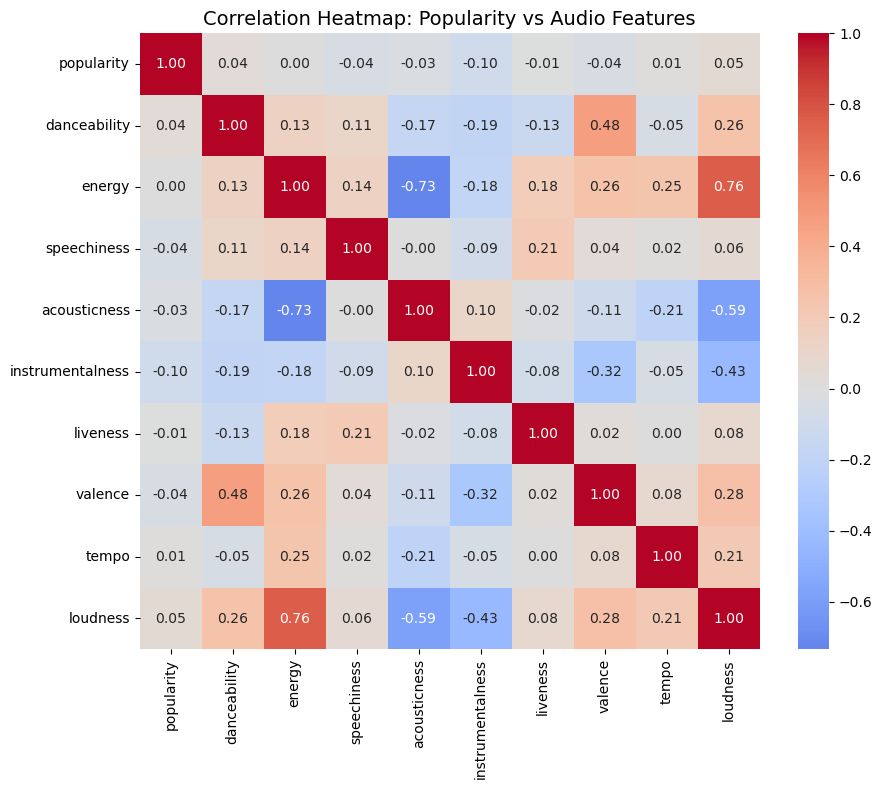

In [30]:
audio_features = [
    'danceability', 'energy', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo', 'loudness'
]

# Compute correlation matrix for popularity and audio features
corr_matrix = spotify[['popularity'] + audio_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title("Correlation Heatmap: Popularity vs Audio Features", fontsize=14)
plt.show()

#this heatmap is useless


C:\Users\natth\AppData\Local\Temp\ipykernel_9336\122590825.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette='coolwarm')


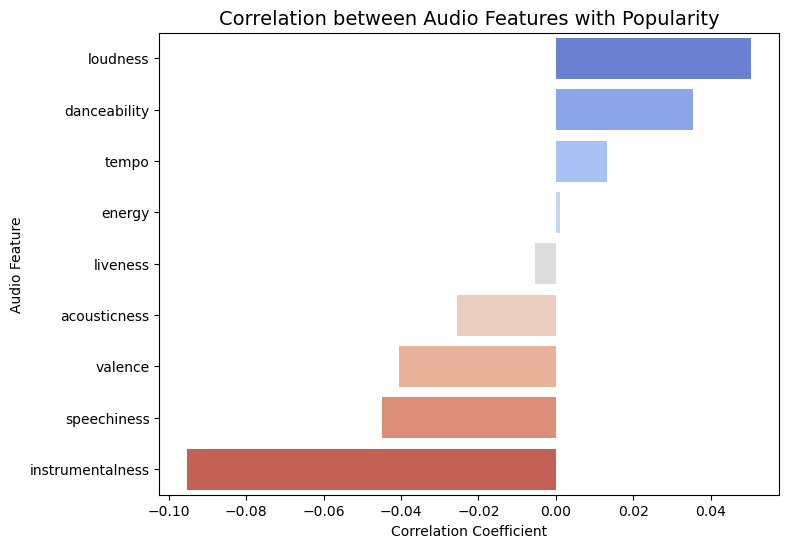

In [31]:

corr = spotify[['popularity'] + audio_features].corr()['popularity'].drop('popularity')
corr = corr.sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=corr.values, y=corr.index, palette='coolwarm')
plt.title('Correlation between Audio Features with Popularity', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Audio Feature')
plt.show() 

#lowkey, create a plot that lists the top X # of genres
#group by only the popular genre 

#The audio features when looking across the entire dataset has very low R^2 value.... maybe just filter for the most popular songs, 
#when popularity greater than a certain threshold and see if there are any strong relationships with popularity and genre or popularity and audio features

FOR ANYONE LOOKING, DO NOT RUN THE SCRIPT BELOW

In [32]:
# spotify_genre_full_pipeline.py
## DO NOT RUN THIS CODE. MUST WAIT 21 HOURS BEFORE NEXT API REQUEST
"""
Resumable Spotify genre lookup for Billboard dataset (single-file).
- Reads billboard.csv (expects columns including 'song' and 'performer').
- Caches results to CACHE_PATH (resumable).
- Handles retries, 429 Retry-After, exponential backoff.
- Merges cached results back into Billboard and writes final CSV.
"""

import os
import time
import random
import tempfile
import shutil
import traceback
import pandas as pd
from tqdm import tqdm
from spotipy import Spotify
from spotipy.oauth2 import SpotifyClientCredentials
from requests.exceptions import ReadTimeout, ConnectionError, HTTPError

# ---------- CONFIG ----------
# Either set these env vars before running, or uncomment and fill here:
os.environ["SPOTIPY_CLIENT_ID"] = "80635eb4e0584b5491cb49e459922e36"
os.environ["SPOTIPY_CLIENT_SECRET"] = "0abb772e1278448d937cbfbefa4fbe20"

BILLBOARD_CSV = "Hot 100.csv"   # input (must contain 'song' and 'performer')
CACHE_PATH = r"C:\temp\spotify_genre_cache.csv"   # non-OneDrive cache (resumable)
OUTPUT_PATH = r"C:\temp\hot100_with_spotify_genres.csv"  # merged output
CHECKPOINT_EVERY = 100
REQUESTS_TIMEOUT = 30
RETRIES = 5
BASE_SLEEP = 1.15         # delay between requests
LIMIT_SONGS_FOR_TEST = None  # set to e.g. 100 to test only first 100 songs, or None for all

# ---------- HELPERS ----------
def normalize(s):
    if pd.isna(s):
        return ""
    return " ".join(str(s).lower().strip().split())

def make_query(title, artist=None):
    if not artist:
        return f'track:"{title}"'
    return f'track:"{title}" artist:"{artist}"'

def atomic_save(df, path):
    """Save df to CSV atomically in the same directory."""
    os.makedirs(os.path.dirname(path), exist_ok=True)
    tmp = tempfile.NamedTemporaryFile(delete=False, suffix=".csv", dir=os.path.dirname(path))
    tmp.close()
    df.to_csv(tmp.name, index=False)
    # use move to replace atomically on most systems
    shutil.move(tmp.name, path)

def load_cache(path):
    if os.path.exists(path):
        df = pd.read_csv(path, dtype=str).fillna("")
        # ensure expected columns exist
        for c in ["title","performer","track_id","artist_ids","artist_genres","spotify_found"]:
            if c not in df.columns:
                df[c] = ""
        return df
    return pd.DataFrame(columns=["title","performer","track_id","artist_ids","artist_genres","spotify_found"])

# ---------- LOAD BILLBOARD ----------
if "billboard" in globals():
    print("Using existing in-memory 'billboard' DataFrame")
else:
    if not os.path.exists(BILLBOARD_CSV):
        raise FileNotFoundError(f"Couldn't find {BILLBOARD_CSV}. Place your input CSV in the script folder or adjust BILLBOARD_CSV.")
    billboard = pd.read_csv(BILLBOARD_CSV, dtype=str).fillna("")

# Optionally limit for testing
if LIMIT_SONGS_FOR_TEST:
    billboard = billboard.head(LIMIT_SONGS_FOR_TEST)

# Ensure performer column exists
if "performer" not in billboard.columns:
    billboard["performer"] = ""

# ---------- INIT SPOTIPY CLIENT ----------
creds = SpotifyClientCredentials()
sp = Spotify(client_credentials_manager=creds, requests_timeout=REQUESTS_TIMEOUT, retries=RETRIES)

# ---------- LOAD CACHE & RESUME CHECK ----------
cache = load_cache(CACHE_PATH)

# Resume info & build 'done' set
if os.path.exists(CACHE_PATH):
    cache = pd.read_csv(CACHE_PATH, dtype=str).fillna("")
    cached_rows = len(cache)
    print(f"✅ Found existing cache file: {CACHE_PATH}")
    print(f"   → {cached_rows:,} rows already processed.\n")
    if cached_rows > 0:
        print("Last 5 cached entries:")
        print(cache.tail(5).to_string(index=False))
else:
    cache = pd.DataFrame(columns=["title","performer","track_id","artist_ids","artist_genres","spotify_found"])
    cached_rows = 0
    print(f"🆕 No existing cache found — starting fresh.\n")

# Build 'done' set (normalized keys)
done = set((normalize(str(r["title"])), normalize(str(r["performer"]))) for _, r in cache.iterrows())
print(f"🔁 Will skip {len(done):,} already-processed (title, performer) pairs.\n")

processed_since_save = 0

# ---------- PREPARE REMAINING PAIRS (so tqdm shows remaining count) ----------
unique_pairs = billboard[["song","performer"]].drop_duplicates().reset_index(drop=True)

# ensure performer col exists (should already)
if "performer" not in unique_pairs.columns:
    unique_pairs["performer"] = ""

# normalized key cols
unique_pairs["title_key"] = unique_pairs["song"].astype(str).apply(normalize)
unique_pairs["performer_key"] = unique_pairs["performer"].astype(str).apply(normalize)

# compute done flag
unique_pairs["is_done"] = unique_pairs.apply(lambda r: (r["title_key"], r["performer_key"]) in done, axis=1)

total_pairs = len(unique_pairs)
done_count = int(unique_pairs["is_done"].sum())
remaining_count = total_pairs - done_count

print(f"Total unique pairs: {total_pairs:,}")
print(f"Already done (in cache): {done_count:,}")
print(f"Remaining to process: {remaining_count:,}\n")

# DataFrame of only remaining rows
remaining_pairs = unique_pairs[~unique_pairs["is_done"]].reset_index(drop=True)

if remaining_count > 0:
    print("First few remaining (song, performer):")
    print(remaining_pairs[["song","performer"]].head(5).to_string(index=False))
else:
    print("Nothing to process — cache already contains all unique pairs.")

# ---------- MAIN LOOP: iterate only over remaining_pairs ----------
try:
    for idx, row in enumerate(tqdm(remaining_pairs.itertuples(index=False), total=len(remaining_pairs))):
        title = str(row.song)
        performer = str(row.performer) if hasattr(row, "performer") else ""
        qt, qa = normalize(title), normalize(performer)

        # query
        query = make_query(title, performer if performer else None)

        # ---- search with retries, 429 handling & backoff ----
        attempt = 0
        items = []
        while attempt < RETRIES:
            try:
                r = sp.search(q=query, type="track", limit=5)
                items = r.get("tracks", {}).get("items", [])
                break
            except HTTPError as e:
                # detect rate-limit
                resp = getattr(e, "response", None)
                if resp is not None and resp.status_code == 429:
                    retry_after = int(resp.headers.get("Retry-After", 5))
                    wait = retry_after + 1
                    print(f"[{idx}] 429 Rate-limited. Sleeping {wait}s (will checkpoint before sleeping).")
                    # checkpoint before sleeping
                    try:
                        atomic_save(cache, CACHE_PATH)
                        print(f"Checkpoint saved to {CACHE_PATH} before long sleep.")
                    except Exception as save_err:
                        print("Warning: could not save cache before sleep:", save_err)
                    time.sleep(wait)
                    continue
                else:
                    print(f"[{idx}] HTTPError (non-429): {e}")
                    traceback.print_exc(limit=1)
                    attempt += 1
                    time.sleep((2 ** attempt) + random.uniform(0, 1))
            except (ReadTimeout, ConnectionError) as e:
                attempt += 1
                wait = min((2 ** attempt) + random.uniform(0, 1), 60)
                print(f"[{idx}] Network error attempt {attempt}, waiting {wait:.1f}s: {e}")
                time.sleep(wait)
            except Exception as e:
                attempt += 1
                print(f"[{idx}] Unexpected search error attempt {attempt}: {e}")
                traceback.print_exc(limit=1)
                time.sleep(min((2 ** attempt), 60))
        else:
            print(f"[{idx}] Giving up search for '{title}' after {RETRIES} retries")
            items = []

        # fallback broader search if no items
        if not items:
            try:
                r2 = sp.search(q=f'track:"{title}"', type="track", limit=10)
                items = r2.get("tracks", {}).get("items", [])
            except Exception as e:
                print(f"[{idx}] fallback search failed: {e}")
                items = []

        # build entry
        if not items:
            entry = {"title": qt, "performer": qa, "track_id": "", "artist_ids": "", "artist_genres": "", "spotify_found": "False"}
        else:
            chosen = None
            for it in items:
                tname = normalize(it["name"])
                anames = [normalize(a["name"]) for a in it["artists"]]
                if tname == qt and (qa == "" or qa in anames):
                    chosen = it
                    break
            if not chosen:
                chosen = items[0]

            track_id = chosen.get("id", "")
            artist_ids = [a.get("id","") for a in chosen.get("artists",[])]
            # fetch artist genres (batch)
            genres = []
            try:
                arts = sp.artists(artist_ids)
                for art in arts.get("artists", []):
                    genres.extend(art.get("genres", []))
                genres = list(dict.fromkeys(genres))
            except Exception as e:
                print(f"[{idx}] Failed to fetch artist info: {e}")
                genres = []

            entry = {
                "title": qt,
                "performer": qa,
                "track_id": track_id or "",
                "artist_ids": ";".join([a for a in artist_ids if a]),
                "artist_genres": ";".join(genres) if genres else "",
                "spotify_found": "True"
            }

        # append to cache and mark done
        cache = pd.concat([cache, pd.DataFrame([entry])], ignore_index=True)
        done.add((qt, qa))
        processed_since_save += 1

        # checkpoint
        if processed_since_save >= CHECKPOINT_EVERY:
            print(f"[{idx}] checkpoint: saving cache ({len(cache)} rows) -> {CACHE_PATH}")
            try:
                atomic_save(cache, CACHE_PATH)
            except Exception as e:
                print("Failed to save cache:", e)
                traceback.print_exc(limit=1)
            processed_since_save = 0

        time.sleep(BASE_SLEEP)

except KeyboardInterrupt:
    print("Interrupted by user — saving cache before exiting...")
    atomic_save(cache, CACHE_PATH)
    raise

# final save
atomic_save(cache, CACHE_PATH)
print(f"Cache saved: {CACHE_PATH} (rows: {len(cache)})")

# ---------- MERGE CACHE BACK INTO BILLBOARD ----------
# normalize keys for merging
billboard["song_key"] = billboard["song"].astype(str).str.lower().str.strip()
billboard["performer_key"] = billboard["performer"].astype(str).str.lower().str.strip()

# prepare res_df from cache
res_df = cache.copy()
res_df = res_df.rename(columns={"title": "title_key", "performer": "performer_key"})
# fill missing columns
for c in ["title_key", "performer_key", "artist_genres"]:
    if c not in res_df.columns:
        res_df[c] = ""
res_df["genre_join"] = res_df["artist_genres"].apply(lambda g: "; ".join([x for x in str(g).split(";") if x]) if g else "")

# merge (left join to keep billboard rows)
merged = billboard.merge(
    res_df[["title_key","performer_key","genre_join"]],
    how="left",
    left_on=["song_key","performer_key"],
    right_on=["title_key","performer_key"]
)

# drop helper columns and reorder if desired
merged = merged.drop(columns=["title_key","performer_key","song_key","performer_key"], errors="ignore")

# save final merged CSV
atomic_save(merged, OUTPUT_PATH)
print(f"Final merged file saved: {OUTPUT_PATH} (rows: {len(merged)})")


Using existing in-memory 'billboard' DataFrame
✅ Found existing cache file: C:\temp\spotify_genre_cache.csv
   → 32,122 rows already processed.

Last 5 cached entries:
                                           title               performer               track_id                                    artist_ids                                                        artist_genres spotify_found
                                            wgft gunnafeaturingburna boy 4kCkgD1ITALBjzBwGsf6tW 2hlmm7s2ICUX0LVIhVFlZQ;3wcj11K77LjEY1PkEazffa melodic rap;afrobeats;afrobeat;afropop;afroswing;dancehall;afropiano          True
                              whoa (mind in awe)            xxxtentacion 7pdF27mSDuPWhppnHAmWHa                        15UsOTVnJzReFVN1VCnxy4                                                              emo rap          True
                                        whoknows                   musiq 69rOfKSz0ys8UdgTkGd6qV                        3UVRliakQfa1pMWIsNuiZ8                

0it [00:00, ?it/s]

Cache saved: C:\temp\spotify_genre_cache.csv (rows: 32122)


Final merged file saved: C:\temp\hot100_with_spotify_genres.csv (rows: 350834)


Based on this, can we attribute the missing genre-matching to pure-randomness? Is this sample of the billboard 100 chart even though we don't have every song representative? Is it okay to have missing values in this case? Basically, should we use this or should we just scratch the idea of trying to understand how the genres of charting music has changed over time?